Importamos los paquetes necesarios

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

Leemos el dataset original

In [28]:
df = pd.read_csv('../data/dataset.csv')  # o pd.read_excel(...)
print(f"Dataset cargado: {df.shape[0]} filas × {df.shape[1]} columnas")

Dataset cargado: 21742 filas × 58 columnas


Nos quedamos con las columnas que queremos preprocesar

In [29]:
columns = ['sq_mt_built', 'sq_mt_useful', 'n_rooms', 'has_lift']
df = df[columns]

Vemos la información de cuantos valores nulos tienen

In [30]:
nulls = df.isnull().mean() * 100
print("Porcentage de nulos por columna:")
display(nulls.sort_values(ascending=False))

Porcentage de nulos por columna:


sq_mt_useful    62.156195
has_lift        10.974151
sq_mt_built      0.579524
n_rooms          0.000000
dtype: float64

Observamos que menos n_rooms, las otras columnas tienen valores nulos. Es necesario preprocesarlas para imputarlos

Empezamos normalizando n_rooms

<Axes: title={'center': 'Distribución n_rooms_built antes'}, ylabel='Frequency'>

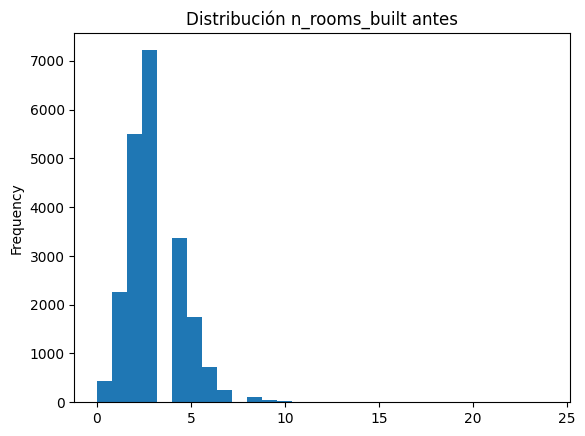

In [31]:
df['n_rooms'].plot(kind='hist', bins=30, title='Distribución n_rooms_built antes')

<Axes: title={'center': 'Distribución n_rooms después'}, ylabel='Frequency'>

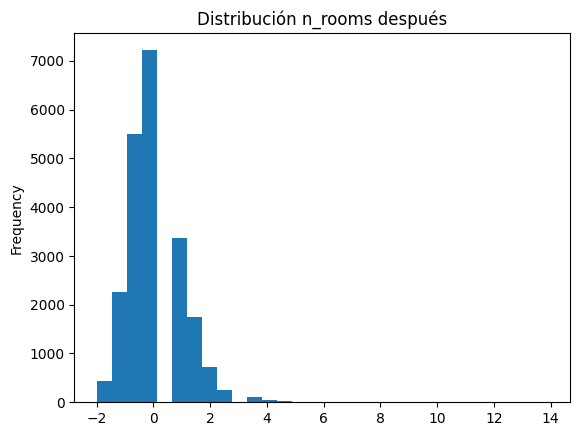

In [32]:
scaler = StandardScaler()
df['n_rooms'] = scaler.fit_transform(df[['n_rooms']])
df['n_rooms'].plot(kind='hist', bins=30, title='Distribución n_rooms después')

Imputamos los valores nulos de sq_mt_build. Observamos que hay algunos outliers, así que será mejor utilizar la mediana. Además, vemos que es necesario normalizar los datos.

Mitjana: 146.9208919319023
Mediana: 100.0


<Axes: title={'center': 'Distribución sq_meters_built antes'}, ylabel='Frequency'>

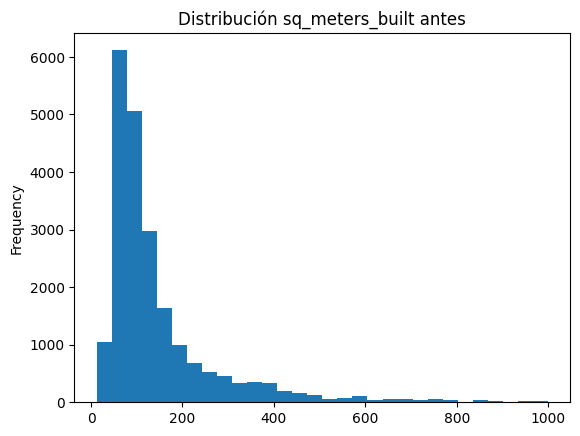

In [33]:
print("Mitjana:", df['sq_mt_built'].mean())
print("Mediana:", df['sq_mt_built'].median())
df['sq_mt_built'].plot(kind='hist', bins=30, title='Distribución sq_meters_built antes')


<Axes: title={'center': 'Distribución sq_meters_built después'}, ylabel='Frequency'>

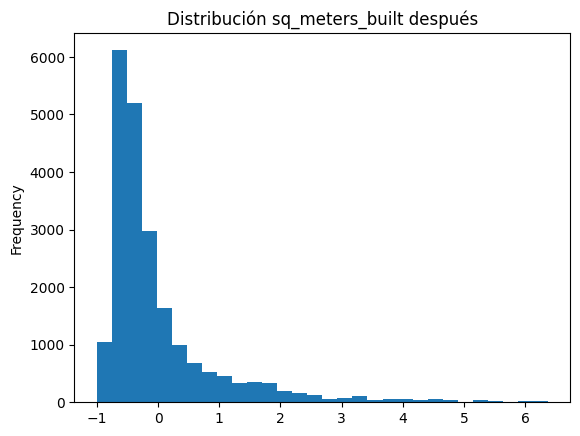

In [34]:
df['sq_mt_built'] = df['sq_mt_built'].fillna(df['sq_mt_built'].median())
scaler = StandardScaler()
df['sq_mt_built'] = scaler.fit_transform(df[['sq_mt_built']])
df['sq_mt_built'].plot(kind='hist', bins=30, title='Distribución sq_meters_built después')

Imputamos los valores nulos de sq_mt_useful. Vemos que hay algunos outliers así que decidimos hacerlo con la mediana. También vemos que es necesario normalizar los datos.

Mitjana: 103.45819154107924
Mediana: 79.0


<Axes: title={'center': 'Distribución sq_meters_useful antes'}, ylabel='Frequency'>

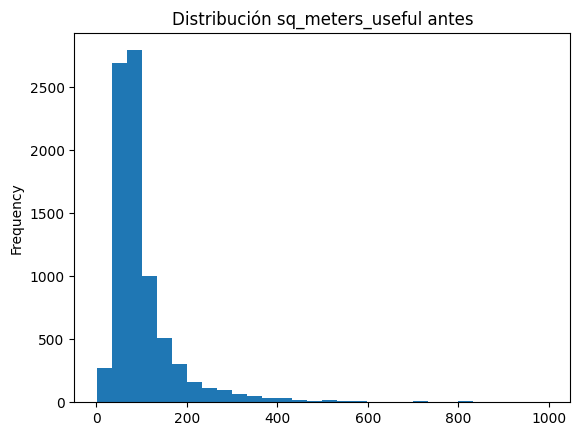

In [35]:
print("Mitjana:", df['sq_mt_useful'].mean())
print("Mediana:", df['sq_mt_useful'].median())
df['sq_mt_useful'].plot(kind='hist', bins=30, title='Distribución sq_meters_useful antes')

<Axes: title={'center': 'Distribución sq_meters_useful después'}, ylabel='Frequency'>

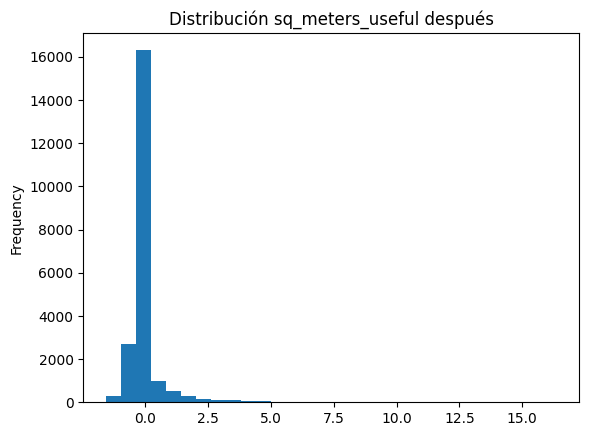

In [36]:
df['sq_mt_useful'] = df['sq_mt_useful'].fillna(df['sq_mt_useful'].median())
scaler = StandardScaler()
df['sq_mt_useful'] = scaler.fit_transform(df[['sq_mt_useful']])
df['sq_mt_useful'].plot(kind='hist', bins=30, title='Distribución sq_meters_useful después')


Imputamos los valores nulos de has_lift. Como puede ser que los casos en que se desconoce si hay ascensor o no estén relacionados con pisos más antiguos y baratos, creamos una nueva categoría unknown representada por el número 2. Además vemos que hay algunas tuplas que tienen valores como 'VERDADERO' o 'FALSO' y otros que tienen '1' o '0'. Dejamos todas con 1 para los verdaderos, 0 para los falsos y 2 para los valores desconocidos.

has_lift
VERDADERO    14885
FALSO         4448
0               13
1               10
Name: count, dtype: int64


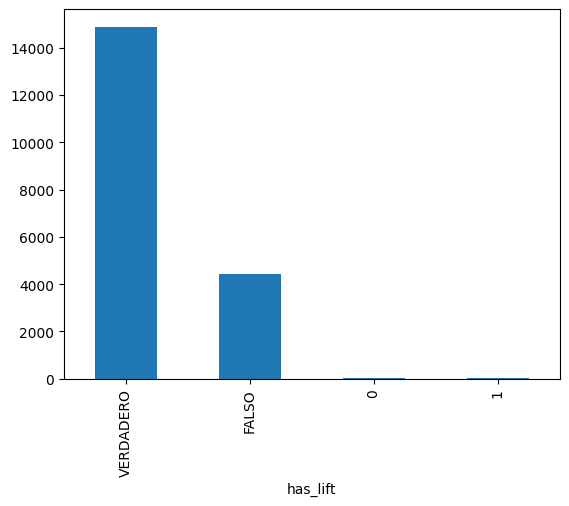

In [37]:

conteo = df['has_lift'].value_counts()
print(conteo)

df['has_lift'].value_counts().plot(kind='bar')
plt.show()

has_lift
1    14895
0     4461
2     2386
Name: count, dtype: int64


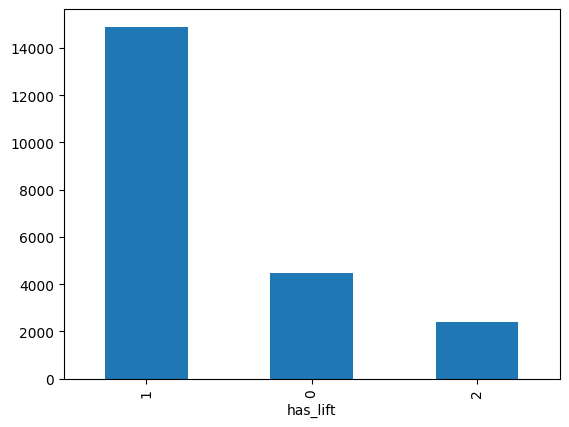

In [38]:
df['has_lift'] = df['has_lift'].fillna('unknown')
df['has_lift'] = df['has_lift'].astype(str)

df['has_lift'] = df['has_lift'].replace({
    'VERDADERO': '1',
    'FALSO': '0',
    'True': '1',
    'False': '0',
    'true': '1',
    'false': '0'
})
valores_validos = {'0', '1'}
df['has_lift'] = df['has_lift'].apply(lambda x: x if x in valores_validos else 'unknown')
df['has_lift'] = df['has_lift'].map({'0': 0, '1': 1, 'unknown': 2})
print(df['has_lift'].value_counts())

df['has_lift'].value_counts().plot(kind='bar')
plt.show()


Comprovamos que se hayan eliminado todos los valores nulos

In [39]:
nulls = df.isnull().mean() * 100
print("Porcentage de nulos por columna:")
display(nulls.sort_values(ascending=False))

Porcentage de nulos por columna:


sq_mt_built     0.0
sq_mt_useful    0.0
n_rooms         0.0
has_lift        0.0
dtype: float64